,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1
...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0


,Nome do Produto,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
0,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,"10,69","20,96",873,22
1,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,879,22
2,Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,880,22
3,Contoso Optical Wheel OEM PS/2 Mouse E60 White,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,881,22
4,Contoso Optical Wheel OEM PS/2 Mouse E60 Silver,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,882,22
...,...,...,...,...,...,...,...,...,...
1685,SV DVD 12-Inch Player Portable M400 Black,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"82,77","179,99",1602,35
1686,SV DVD 9-Inch Player Portable M300 Silver,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"73,57","159,99",1606,35
1687,SV DVD 12-Inch Player Portable M400 Silver,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"82,77","179,99",1607,35
1688,SV DVD 9-Inch Player Portable M300 White,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"73,57","159,99",1611,35


,ID Loja,Nome da Loja,Quantidade Colaboradores,País
0,1,Loja Contoso Seattle No.1,17.0,Estados Unidos
1,2,Loja Contoso Seattle No.2,25.0,Estados Unidos
2,3,Loja Contoso Kennewick,26.0,Estados Unidos
3,4,Loja Contoso Bellevue,19.0,Estados Unidos
4,5,Loja Contoso Redmond,33.0,Estados Unidos
...,...,...,...,...
301,306,Loja Contoso Europe Online,7.0,Alemanha
302,307,Loja Contoso Asia Online,8.0,China
303,308,Loja Contoso North America Reseller,15.0,Estados Unidos
304,309,Loja Contoso Europe Reseller,12.0,França


,ID Cliente,Primeiro Nome,Sobrenome,E-mail,Genero,Numero de Filhos,Data de Nascimento,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1,Garnet,Lanfranchi,glanfranchi0@mayoclinic.com,Feminino,2,12/05/1995,NaN,NaN,NaN,NaN
1,2,Lurette,Roseblade,lroseblade1@bigcartel.com,Feminino,2,30/06/1943,NaN,NaN,NaN,NaN
2,3,Glenden,Ishchenko,gishchenko2@moonfruit.com,Masculino,5,09/04/1989,NaN,NaN,NaN,NaN
3,4,Baron,Jedrzejewsky,bjedrzejewsky3@e-recht24.de,Masculino,4,17/11/1998,NaN,NaN,NaN,NaN
4,5,Sheree,Bredbury,sbredbury4@sitemeter.com,Feminino,5,08/09/1975,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
39499,39500,Brandy,Malhotra,brandy0@adventure-works.com,Masculino,3,27/07/1980,NaN,NaN,NaN,NaN
39500,39501,Alicia,Raje,alicia12@adventure-works.com,Feminino,5,10/05/2001,NaN,NaN,NaN,NaN
39501,39502,Connie,Rai,connie4@adventure-works.com,Feminino,0,13/02/1997,NaN,NaN,NaN,NaN
39502,39503,Shawn,Raji,shawn23@adventure-works.com,Masculino,1,29/03/2001,NaN,NaN,NaN,NaN


,ID Cliente,E-mail
0,1,glanfranchi0@mayoclinic.com
1,2,lroseblade1@bigcartel.com
2,3,gishchenko2@moonfruit.com
3,4,bjedrzejewsky3@e-recht24.de
4,5,sbredbury4@sitemeter.com
...,...,...
39499,39500,brandy0@adventure-works.com
39500,39501,alicia12@adventure-works.com
39501,39502,connie4@adventure-works.com
39502,39503,shawn23@adventure-works.com


,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Adventure Works Laptop12 M1201 Silver,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
3,18610,08/01/2017,10/01/2017,2,200,448,2,6825,48,0,WWI Desktop PC1.80 E1801 Black,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp
4,287704,23/04/2017,26/04/2017,3,76,280,1,6825,10,0,Contoso Home Theater System 2.1 Channel M1210 ...,Loja Contoso Beaumont No.1,rbrumfieldmy@ameblo.jp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,878244,23/11/2017,23/11/2017,0,110,889,4,347,12,1,Contoso Bluetooth Notebook Mouse E70 Silver,Loja Contoso Orlando,edowner9m@imdb.com
980638,920243,09/12/2017,10/12/2017,1,261,1367,5,38781,13,0,Contoso Expandable 3-Handset Cordless Phone Sy...,Loja Contoso Damascus No.1,ruben31@adventure-works.com
980639,467482,21/06/2017,25/06/2017,4,115,269,1,553,10,0,Contoso Home Theater System 4.1 Channel M1400 ...,Loja Contoso New York No.1,akuhnertfc@themeforest.net
980640,853643,13/11/2017,20/11/2017,7,115,809,4,38860,6,0,Contoso Dual USB Power Adapter - power adapter...,Loja Contoso New York No.1,anne5@adventure-works.com


karen33@adventure-works.com      77
chloe77@adventure-works.com      74
julia43@adventure-works.com      69
destiny66@adventure-works.com    68
gilbert9@adventure-works.com     68
                                 ..
ekybertfo@jigsy.com               1
latasha2@adventure-works.com      1
mtrimmill2d@abc.net.au            1
kpledger3e@yale.edu               1
samuel68@adventure-works.com      1
Name: E-mail, Length: 38907, dtype: int64

<AxesSubplot:>

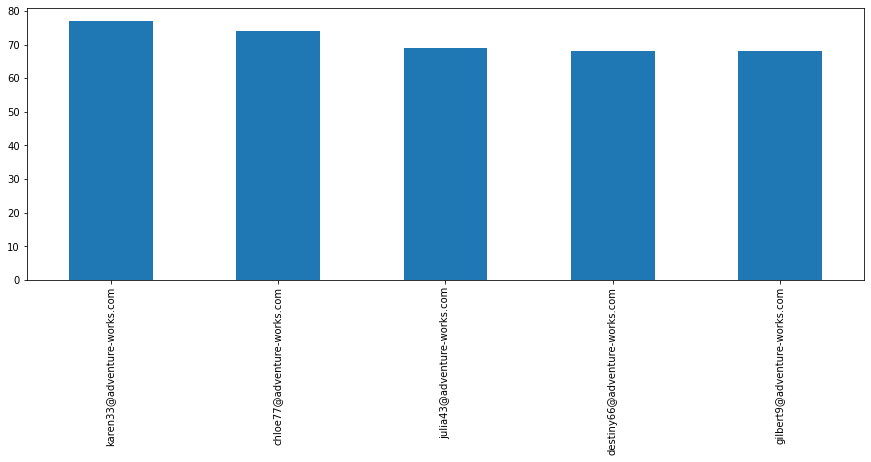

In [6]:
import pandas as pd


#vendas_df['coluna_x'] -> uma lista com os valores da coluna_x (em formato dataframe, é um dataframe com 1 coluna só)
#vendas_df[0] -> NÃO FUNCIONA ASSIM PARA DATAFRAMES
#vendas_df[:3] -> pega até a linha de índice 3 do dataframe
#vendas_df[['coluna_x', 'coluna_y', 'coluna_z']] -> cria um novo dataframe com as colunas coluna_x, coluna_y e coluna_z
#vendas_df['coluna_x'][0] -> pega o itemd a 1ª linha da coluna coluna_x

# sep --- tira virgulas tabela 
## .info --- demostra todas informacoes que tem na sua base de dados 


vendas_df = pd.read_csv(r'./Contoso - Vendas  - 2017.csv', sep = ';')
produtos_df = pd.read_csv(r'./Contoso - Cadastro Produtos.csv', sep = ';')
lojas_df = pd.read_csv(r'./Contoso - Lojas.csv', sep = ';')
clientes_df = pd.read_csv(r'./Contoso - Clientes.csv', sep = ';')

display(vendas_df)
display(produtos_df)
display(lojas_df)
display(clientes_df)


## excluindo colunas com drop, .drop e infomra as colunas a retirar, axis 1 (coluna)
clientes_df = clientes_df.drop(['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'], axis = 1)


###SELECIONANDO COLUNAS QUE DESEJA PARA ANALISE DE DADOS 
clientes_df = clientes_df[['ID Cliente', 'E-mail' ]]
produtos_df = produtos_df[['ID Produto', 'Nome do Produto']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]
display(clientes_df)

#MESCLANDO COLUNAS PARA ANALISE DE DADOS MÉTODO ()MERGE 0n = coluna que deseja juntar 

vendas_df = vendas_df.merge(produtos_df, on= 'ID Produto')
vendas_df = vendas_df.merge(lojas_df, on= 'ID Loja')
vendas_df = vendas_df.merge(clientes_df, on= 'ID Cliente')
display(vendas_df)

##renomer nome de colunas 
#vendas_df = vendas_df.rename(columns={'E-mail':'E-mailCliente'})
#display(vendas_df)

##ALGUMAS ANALISES DE DADOS ###

##QUAL CLIENTE COMPROU MAIS 

# .value_counts() soma a quantidade de valor sobre a coluna 

frequencia_cliente = vendas_df['E-mail'].value_counts()
display(frequencia_cliente)

###PLATANDO EM GRAFICO # [:5] os 5 primeiros; figsize aumenta o grafico conforme sua solicitacao 

frequencia_cliente[:5].plot(figsize = (15,5), kind = 'bar') 




#ANALISAR QUAL LOJA VENDEU MAIS


In [25]:
vendas_lojas = vendas_df.groupby('Nome da Loja').sum()
vendas_lojas = vendas_lojas[['Quantidade Vendida']]
display(vendas_lojas)

,Quantidade Vendida
Nome da Loja,
Loja Contoso Albany,26353
Loja Contoso Alexandria,26247
Loja Contoso Amsterdam,28294
Loja Contoso Anchorage,27451
Loja Contoso Annapolis,26065
...,...
Loja Contoso Yokohama,28023
Loja Contoso York,27164
Loja Contoso koln No.1,29046


#ordenando por valores
#ascending ordena de forma decrescente
vendas_lojas = vendas_lojas.sort_values('Quantidade Vendida', ascending = False)
display(vendas_lojas)
#podemos plotar em um gráfico, apenas as 5 primeiras [:5]
vendas_lojas[:5].plot(figsize=(15, 5), kind='barh',)

In [31]:
#pegando o maior valor e se índice 
maior_valor = vendas_lojas['Quantidade Vendida'].max()
melhor_loja = vendas_lojas['Quantidade Vendida'].idxmax()
print(melhor_loja, maior_valor)

#produto que menos vendeu, pegando ultimo item da tabela

vendas_lojas[-1:]

Loja Contoso Catalog  1029117


,Quantidade Vendida
Nome da Loja,
Loja Contoso Venezia,234


### FILTRANDO DADOS NAS DATAFRAMES
        
        